In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

Importing the data and sorting out columns as per the requiremnts of the question:

In [6]:
#Importing the user and movie rating data:
movielens = pd.read_csv('C:/Users/Pulkit Dixit/Downloads/ml-100k/ml-100k/u.data', 
                        sep='\t', 
                        header=None, 
                        names=['user_id','movie_id','rating','timestamp'])
movielens.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
#Importing movies data:
movies = pd.read_csv('C:/Users/Pulkit Dixit/Downloads/ml-100k/ml-100k/u.item', 
                     sep = '|', 
                     header = None, 
                     encoding='latin-1',
                     names = ['movie_id', 
                              'movie_name', 
                              'release_date', 
                              'video_release_date',
                              'imdb_url',
                              'unknown',
                              'action',
                              'adventure',
                              'animation',
                              'children',
                              'comedy',
                              'crime',
                              'documentary',
                              'drama',
                              'fantasy',
                              'film_noir',
                              'horror',
                              'musical',
                              'mystery',
                              'romance',
                              'sci_fi',
                              'thriller',
                              'war',
                              'western']
                    )
print(movies.head())

   movie_id         movie_name release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            imdb_url  unknown  action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   adventure  animation  children  ...  fantasy  film_noir  horror  musical  \
0          0          1         1  ...        0          0       0        0   


In [4]:
#Importing users data:
users = pd.read_csv('C:/Users/Pulkit Dixit/Downloads/ml-100k/ml-100k/u.user', 
                     sep = '|', 
                     header = None, 
                     names = ['user_id', 'age', 'gender', 'occupation', 'zipcode'])

#Converting occupation and gender to categorical variables:
users[['occupation', 'gender']] = users[['occupation', 'gender']].astype('category')
print(users.head())
print(users.info())

   user_id  age gender  occupation zipcode
0        1   24      M  technician   85711
1        2   53      F       other   94043
2        3   23      M      writer   32067
3        4   24      M  technician   43537
4        5   33      F       other   15213
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null category
occupation    943 non-null category
zipcode       943 non-null object
dtypes: category(2), int64(2), object(1)
memory usage: 24.9+ KB
None


Using matrix factorization to predict the ratings:

In [8]:
def matrix_factorization(R, k=2, alpha=0.1, beta=0.01, steps=20):
    #R = input matrix
    #k = number of latent factors
    #alpha, beta = tuning parameters
    #steps = number of iterations
    
    #Setting variables for the dimensions of the matrix for users and movies:
    num_users = R.shape[0]
    num_movies = R.shape[1]
    
    #Setting P and Q as random normalized latent factor matrices
    #for users and movies respectively:
    P = np.round(np.random.rand(num_users, k), 2)
    Q = np.round(np.random.rand(num_movies, k), 2)
    
    #Looping to get the least error value:
    for n in range(steps):
        for i in range(num_users):
            for j in range(num_movies):
                if R[i][j]>0:
                    e = R[i][j] - np.round((np.dot(P[i,:],Q[j,:].T)),2)
                    e = round(e,2)
                    
                    #Updating the user and movie latent feature matrices:
                    P[i, :] = P[i, :] + alpha * (e * Q[j, :] - beta * P[i,:])
                    P[i, :] = np.round(P[i,:], 2)
                    Q[j, :] = Q[j, :] + alpha * (e * P[i, :] - beta * Q[j,:])
                    Q[j, :] = np.round(Q[j,:], 2)
    
    #Returning the predicted matrix:
    return(P.dot(Q.T))

Creating a function to calculate the RMSE of the predictions:

In [9]:
def rmse(R, predR):
    
    num_users = R.shape[0]
    num_movies = R.shape[1]
    
    err = 0
    
    for i in range(num_users):
        for j in range(num_movies):
            if R[i][j] > 0:
                err = err + pow((R[i][j] - predR[i][j]), 2)
    
    return(np.sqrt(err))

Running the functions on the given dataset:

In [10]:
R = pd.read_csv('C:/Users/Pulkit Dixit/Downloads/ml-100k/ml-100k/u.data', 
                        sep='\t', 
                        header=None, 
                        names=['user_id','movie_id','rating','timestamp'])

#Create a pivot table of user_id, movie_id and ratings:
R = R.pivot_table(index='user_id', columns='movie_id', values='rating', fill_value = 0)
print(R.head())

#Extract a matrix of values:
R = R.values
R = R.astype(int)

#Run the functions:
predR = matrix_factorization(R, 10, 0.01, 0.0001, 30)
rms_error = rmse(R, predR)

#Print the results:
print(predR)
print(rms_error)

movie_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                               ...   
1            5     3     4     3     3     5     4     1     5     3  ...   
2            4     0     0     0     0     0     0     0     0     2  ...   
3            0     0     0     0     0     0     0     0     0     0  ...   
4            0     0     0     0     0     0     0     0     0     0  ...   
5            4     3     0     0     0     0     0     0     0     0  ...   

movie_id  1673  1674  1675  1676  1677  1678  1679  1680  1681  1682  
user_id                                                               
1            0     0     0     0     0     0     0     0     0     0  
2            0     0     0     0     0     0     0     0     0     0  
3            0     0     0     0     0     0     0     0     0     0  
4            0     0     0     0     0     0     0     0     0     0  
5            0     0     0     0  

Performing 5-fold CV on the training sets:

In [35]:
def training_set():
    #Creating a list to store the RMSE values for each iteration:
    RMSE = list()
    
    #Creating a loop to run 5 times for the 5 training sets:
    for i in range(5):
        #Import data:
        path = 'C:/Users/Pulkit Dixit/Downloads/ml-100k/ml-100k/u'+str(i+1)+'.base'
        train_set = pd.read_csv(path, 
                                sep='\t', 
                                header=None, 
                                names=['user_id','movie_id','rating','timestamp'])

        #Create a pivot table of user_id, movie_id and ratings:
        train_set = train_set.pivot_table(index='user_id', columns='movie_id', values='rating', fill_value = 0)
        #print(train_set.head())

        #Extract a matrix of values:
        train_set = train_set.values
        train_set = train_set.astype(int)
        
        #Run the functions:
        predR = matrix_factorization(train_set, 10, 0.01, 0.0001, 10)
        err = rmse(train_set, predR)
        print(err)
        RMSE.append(err)
    
    return(RMSE)

In [36]:
RMSE_train = training_set()

256.25412314825064
257.30452648911864
256.31879149463253
256.75125602933196
256.66967034365393


In [37]:
print('The training RMSE is:', sum(RMSE_train)/len(RMSE_train))

The training RMSE is: 256.65967350099754


Getting the RMSE for the 5 test sets:

In [56]:
def test_set():
    #Creating a list to store the RMSE values for each iteration:
    RMSE = list()
    
    #Creating a loop to run 5 times for the 5 training sets:
    for i in range(5):
        #Import data:
        path = 'C:/Users/Pulkit Dixit/Downloads/ml-100k/ml-100k/u'+str(i+1)+'.test'
        test_set = pd.read_csv(path, 
                                sep='\t', 
                                header=None, 
                                names=['user_id','movie_id','rating','timestamp'])

        #Create a pivot table of user_id, movie_id and ratings:
        test_set = test_set.pivot_table(index='user_id', columns='movie_id', values='rating', fill_value = 0)
        #print(train_set.head())

        #Extract a matrix of values:
        test_set = test_set.values
        test_set = test_set.astype(int)
        
        #Run the functions:
        predR = matrix_factorization(test_set, 10, 0.01, 0.0001, 10)
        err = rmse(test_set, predR)
        print(err)
        RMSE.append(err)
    
    return(RMSE)

In [44]:
RMSE_test = test_set()

92.73448162582262
88.52239434030257
87.86139176891066
87.49892897550215
88.55255250268053


In [45]:
print('The test RMSE is:', sum(RMSE_test)/len(RMSE_test))

The test RMSE is: 89.03394984264371


These results are in line with expectations. Since the training sets have 4 times the data, their RMSEs are a lot more than the test RMSE, but not proportionally. This shows an absence of overfitting.

Merging datasets to help create visualizations:

In [32]:
#Merging the main dataset with the movies and users datasets:
movielens = pd.merge(movielens, movies, on = 'movie_id')
movielens = pd.merge(movielens, users, on = 'user_id')
movielens.head()

,user_id,movie_id,rating,timestamp,movie_name,release_date,video_release_date,imdb_url,unknown,action,...,mystery,romance,sci_fi,thriller,war,western,age,gender,occupation,zipcode
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,49,M,writer,55105
1,196,257,2,881251577,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,1,...,0,0,1,0,0,0,49,M,writer,55105
2,196,111,4,881251793,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Truth%20About...,0,0,...,0,1,0,0,0,0,49,M,writer,55105
3,196,25,4,881251955,"Birdcage, The (1996)",08-Mar-1996,NaN,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,0,...,0,0,0,0,0,0,49,M,writer,55105
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Adventures%20...,0,0,...,0,0,0,0,0,0,49,M,writer,55105


Visualizing the distribution of ratings by movie:

In [33]:
#Creating a summary table for average and counts of ratings by movie:
rating_summary = pd.DataFrame(movielens.groupby('movie_name')['rating'].mean())
rating_summary['number_of_ratings'] = movielens.groupby('movie_name')['rating'].count()
rating_summary.columns = ['average_rating', 'number_of_ratings']
rating_summary.head()

,average_rating,number_of_ratings
movie_name,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


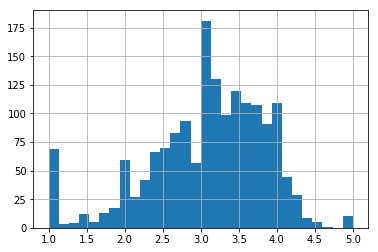

In [34]:
#Creating a histogram of average ratings:
rating_summary['average_rating'].hist(bins=30)

The above graph shows that most movies are rated between 2.5 an 4.0. This shows that most viewers either rate movies as at least decent, or watch previously well rated movies.

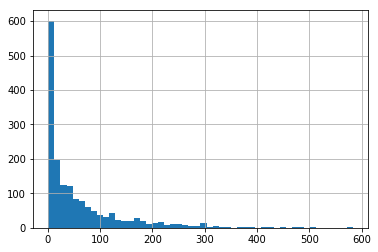

In [46]:
#Creating a histogram of counts of movie ratings:
rating_summary['number_of_ratings'].hist(bins=50)

The above graph shows that very few movies are actually rated, thus showing sparsity in the data.

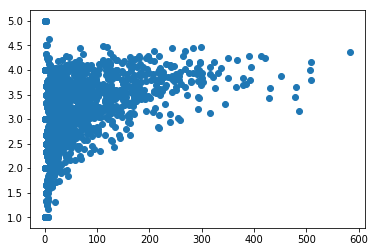

In [47]:
#Creating a scatterplot:
plt.scatter(rating_summary['number_of_ratings'], rating_summary['average_rating'])

The above graph shows that movies tend to get rated better and better as their viewings increase. This might be because of bias from the user, since he/she only views well reviewed movies and proceeds to rate them highly.

The next few graphs show more biases from the users, based on their genders and age-groups.

[Text(0, 0.5, 'Average Rating'), Text(0.5, 0, 'Number of Ratings')]

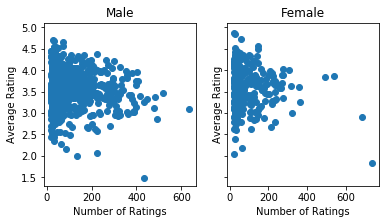

In [50]:
#Categorizign users based on genders:
muser_rating_summary = pd.DataFrame(movielens.loc[movielens['gender'] == 'M'].groupby(['user_id', 'gender'])['rating'].mean())
muser_rating_summary['number_of_ratings'] = movielens.loc[movielens['gender'] == 'M'].groupby(['user_id', 'gender'])['rating'].count()
muser_rating_summary.columns = ['average_rating', 'number_of_ratings']

fuser_rating_summary = pd.DataFrame(movielens.loc[movielens['gender'] == 'F'].groupby(['user_id', 'gender'])['rating'].mean())
fuser_rating_summary['number_of_ratings'] = movielens.loc[movielens['gender'] == 'F'].groupby(['user_id', 'gender'])['rating'].count()
fuser_rating_summary.columns = ['average_rating', 'number_of_ratings']

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (6,3))

ax1.scatter(muser_rating_summary['number_of_ratings'], muser_rating_summary['average_rating'])
ax1.set_title('Male')
ax1.set(xlabel = 'Number of Ratings', ylabel = 'Average Rating')

ax2.scatter(fuser_rating_summary['number_of_ratings'], fuser_rating_summary['average_rating'])
ax2.set_title('Female')
ax2.set(xlabel = 'Number of Ratings', ylabel = 'Average Rating')

[Text(0, 0.5, 'Average Rating'), Text(0.5, 0, 'Number of Ratings')]

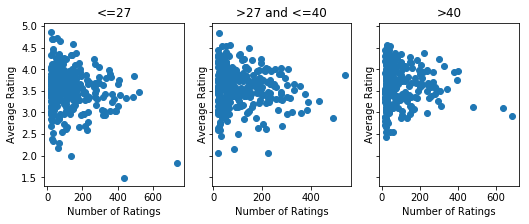

In [51]:
#Categorization based on age-groups:
user25_rating_summary = pd.DataFrame(movielens.loc[movielens['age'] <= 27].groupby(['user_id', 'age'])['rating'].mean())
user25_rating_summary['number_of_ratings'] = movielens.loc[movielens['age'] <= 27].groupby(['user_id', 'age'])['rating'].count()
user25_rating_summary.columns = ['average_rating', 'number_of_ratings']

user2540_rating_summary = pd.DataFrame(movielens.loc[(movielens['age'] > 27) & (movielens['age'] <= 40)].groupby(['user_id', 'age'])['rating'].mean())
user2540_rating_summary['number_of_ratings'] = movielens.loc[(movielens['age'] > 27) & (movielens['age'] <= 40)].groupby(['user_id', 'age'])['rating'].count()
user2540_rating_summary.columns = ['average_rating', 'number_of_ratings']

user40_rating_summary = pd.DataFrame(movielens.loc[movielens['age'] > 40].groupby(['user_id', 'age'])['rating'].mean())
user40_rating_summary['number_of_ratings'] = movielens.loc[movielens['age'] > 40].groupby(['user_id', 'age'])['rating'].count()
user40_rating_summary.columns = ['average_rating', 'number_of_ratings']

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (8.5,3))

ax1.scatter(user25_rating_summary['number_of_ratings'], user25_rating_summary['average_rating'])
ax1.set_title('<=27')
ax1.set(xlabel = 'Number of Ratings', ylabel = 'Average Rating')

ax2.scatter(user2540_rating_summary['number_of_ratings'], user2540_rating_summary['average_rating'])
ax2.set_title('>27 and <=40')
ax2.set(xlabel = 'Number of Ratings', ylabel = 'Average Rating')

ax3.scatter(user40_rating_summary['number_of_ratings'], user40_rating_summary['average_rating'])
ax3.set_title('>40')
ax3.set(xlabel = 'Number of Ratings', ylabel = 'Average Rating')

The above charts show variances in both the average ratings that they give and the number of ratings that they give. Thus, a new model incorporating biases from the users should be created to get better results.

Creating a model incorporating bias:

In [52]:
def biased_matrix_factorization(R, k=2, alpha=0.1, beta=0.01, steps=20):
    #R = input matrix
    #k = number of latent factors
    #alpha, beta = tuning parameters
    #steps = number of iterations
    
    #Setting variables for the dimensions of the matrix for users and movies:
    num_users = R.shape[0]
    num_movies = R.shape[1]
    
    #Setting P and Q as random normalized latent factor matrices
    #for users and movies respectively:
    P = np.round(np.random.rand(num_users, k), 2)
    Q = np.round(np.random.rand(num_movies, k), 2)
    
    #Setting biases as zeros and the mean of all the non-zero values in the matrix:
    b1 = np.zeros(num_users)
    b2 = np.zeros(num_movies)
    b3 = round(np.mean(R[np.where(R != 0)]),2)
    
    #Looping to get the least error value:
    for n in range(steps):
        for i in range(num_users):
            for j in range(num_movies):
                if R[i][j]>0:
                    e = R[i][j] - (b3 + b1[i] + b2[j] + np.round(np.dot(P[i,:],Q[j,:].T),2))
                    e = round(e,2)
                    
                    #Updating biases:
                    b1[i] = b1[i] + alpha * (e - beta * b1[i])
                    b1[i] = round(b1[i],2)
                    b2[j] = b2[j] + alpha * (e - beta * b2[j])
                    b2[j] = round(b2[j], 2)
                    
                    #Updating the user and movie latent feature matrices:
                    P[i, :] = P[i, :] + alpha * (e * Q[j, :] - beta * P[i,:])
                    P[i, :] = np.round(P[i,:], 2)
                    Q[j, :] = Q[j, :] + alpha * (e * P[i, :] - beta * Q[j,:])
                    Q[j, :] = np.round(Q[j,:], 2)
    
    #Returning the predicted matrix:
    return(b3 + b1[:,np.newaxis] + b2[np.newaxis:,] + P.dot(Q.T))

Running the data on training and testing sets to check for RMSEs:

In [55]:
def biased_training_set():
    #Creating a list to store the RMSE values for each iteration:
    RMSE = list()
    
    #Creating a loop to run 5 times for the 5 training sets:
    for i in range(5):
        #Import data:
        path = 'C:/Users/Pulkit Dixit/Downloads/ml-100k/ml-100k/u'+str(i+1)+'.base'
        train_set = pd.read_csv(path, 
                                sep='\t', 
                                header=None, 
                                names=['user_id','movie_id','rating','timestamp'])

        #Create a pivot table of user_id, movie_id and ratings:
        train_set = train_set.pivot_table(index='user_id', columns='movie_id', values='rating', fill_value = 0)
        #print(train_set.head())

        #Extract a matrix of values:
        train_set = train_set.values
        train_set = train_set.astype(int)
        
        #Run the functions:
        predR = biased_matrix_factorization(train_set, 10, 0.01, 0.0001, 10)
        err = rmse(train_set, predR)
        print(err)
        RMSE.append(err)
    
    return(RMSE)

In [57]:
RMSE_train_biased = biased_training_set()

243.71009484750428
243.87416702927
244.77726317691253
245.03700678558627
245.38702164723233


In [58]:
print('The training RMSE for the biased model is:', sum(RMSE_train_biased)/len(RMSE_train_biased))

The training RMSE for the biased model is: 244.55711069730108


In [61]:
def biased_test_set():
    #Creating a list to store the RMSE values for each iteration:
    RMSE = list()
    
    #Creating a loop to run 5 times for the 5 training sets:
    for i in range(5):
        #Import data:
        path = 'C:/Users/Pulkit Dixit/Downloads/ml-100k/ml-100k/u'+str(i+1)+'.test'
        test_set = pd.read_csv(path, 
                                sep='\t', 
                                header=None, 
                                names=['user_id','movie_id','rating','timestamp'])

        #Create a pivot table of user_id, movie_id and ratings:
        test_set = test_set.pivot_table(index='user_id', columns='movie_id', values='rating', fill_value = 0)
        #print(train_set.head())

        #Extract a matrix of values:
        test_set = test_set.values
        test_set = test_set.astype(int)
        
        #Run the functions:
        predR = biased_matrix_factorization(test_set, 10, 0.01, 0.0001, 10)
        err = rmse(test_set, predR)
        print(err)
        RMSE.append(err)
    
    return(RMSE)

In [62]:
RMSE_test_biased = biased_test_set()

95.8994139667703
94.79526124617226
91.93131653441054
93.26568327734472
92.60160145067681


In [63]:
print('The test RMSE for the biased model is:', sum(RMSE_test_biased)/len(RMSE_test_biased))

The test RMSE for the biased model is: 93.69865529507493


Thus, the RMSE of the recommender system can be improved by incorporating user bias.